# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.
Observation 1: Southern Hemisphere climates tend to be slightly milder than those at similar latitudes in the Northern Hemisphere. This is because the Southern Hemisphere has significantly more ocean and much less land; water heats up and cools down more slowly than land.

Observation 2: Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops. This happens as equatorial region receives sunlight straight with less or no angle due to curvature shape of earth.

Observation 3: Latitude doesn't have a strong iinfluence on wind speed. The speed of the wind is controlled by the strength of the air pressure gradient, the stronger the pressure gradient the higher the wind speed.

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import requests
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
#from config import api_key
#Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [31]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

In [32]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [33]:
# Google API Key
#from config import gkey

print("Beginning Data Retrieval ")
print("-----------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="
#query_url = url + "api-key=" + api_key + "&q=" + query


# For each city name in cities list, do below things...
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 : kyra
Processing Record 2 of Set 1 : ponta delgada
Processing Record 3 of Set 1 : coahuayana
Processing Record 4 of Set 1 : kodiak
Processing Record 5 of Set 1 : pevek
Processing Record 6 of Set 1 : butaritari
Processing Record 7 of Set 1 : hermanus
City not found. Skipping...
Processing Record 8 of Set 1 : busselton
Processing Record 9 of Set 1 : payakumbuh
City not found. Skipping...
Processing Record 10 of Set 1 : bluff
Processing Record 11 of Set 1 : iqaluit
Processing Record 12 of Set 1 : katsuura
Processing Record 13 of Set 1 : mataura
Processing Record 14 of Set 1 : airai
Processing Record 15 of Set 1 : makakilo city
Processing Record 16 of Set 1 : atuona
Processing Record 17 of Set 1 : ribeira grande
Processing Record 18 of Set 1 : arraial do cabo
Processing Record 19 of Set 1 : port alfred
Processing Record 20 of Set 1 : chengde
Processing Record 21 of Set 1 : kapaa
Processing Record 22 of Se

Processing Record 32 of Set 4 : esperance
Processing Record 33 of Set 4 : el tigre
Processing Record 34 of Set 4 : plettenberg bay
Processing Record 35 of Set 4 : komsomolskiy
Processing Record 36 of Set 4 : richards bay
Processing Record 37 of Set 4 : ahipara
Processing Record 38 of Set 4 : kawalu
Processing Record 39 of Set 4 : raudeberg
Processing Record 40 of Set 4 : bandarbeyla
Processing Record 41 of Set 4 : kilifi
Processing Record 42 of Set 4 : mandalgovi
Processing Record 43 of Set 4 : namibe
Processing Record 44 of Set 4 : doha
Processing Record 45 of Set 4 : lorengau
Processing Record 46 of Set 4 : formosa
Processing Record 47 of Set 4 : georgetown
Processing Record 48 of Set 4 : qaanaaq
Processing Record 49 of Set 4 : shimoda
Processing Record 50 of Set 4 : ponta do sol
City not found. Skipping...
Processing Record 0 of Set 5 : enid
Processing Record 1 of Set 5 : qorveh
Processing Record 2 of Set 5 : kruisfontein
Processing Record 3 of Set 5 : kaohsiung
Processing Record 4 

Processing Record 18 of Set 8 : brae
Processing Record 19 of Set 8 : rocha
Processing Record 20 of Set 8 : malinyi
Processing Record 21 of Set 8 : yuncheng
Processing Record 22 of Set 8 : concepcion de buenos aires
Processing Record 23 of Set 8 : yarmouth
Processing Record 24 of Set 8 : lincoln
Processing Record 25 of Set 8 : gimli
Processing Record 26 of Set 8 : mata
Processing Record 27 of Set 8 : north branch
Processing Record 28 of Set 8 : gudari
Processing Record 29 of Set 8 : sao joao da barra
Processing Record 30 of Set 8 : kurchum
Processing Record 31 of Set 8 : manggar
City not found. Skipping...
Processing Record 32 of Set 8 : leshukonskoye
Processing Record 33 of Set 8 : batagay
Processing Record 34 of Set 8 : marawi
Processing Record 35 of Set 8 : varkkallai
Processing Record 36 of Set 8 : tibu
Processing Record 37 of Set 8 : margate
Processing Record 38 of Set 8 : el alto
Processing Record 39 of Set 8 : ketchikan
Processing Record 40 of Set 8 : beni suef
Processing Record 

In [34]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Humidity" : humidity_list,
                "Cloudiness" : cloudiness_list,
                "Wind Speed" : wind_speed_list, 
                "Country" : country_list,
                "Date" : date_list,
                               
})


In [35]:
# Count data
weather_dict.count()

City          526
Lat           526
Lng           526
Max Temp      526
Humidity      526
Cloudiness    526
Wind Speed    526
Country       526
Date          526
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [38]:
# Save city data into a csv file
weather_dict.to_csv("output_data_file.csv")


In [39]:
#Display the Data Frame
weather_dict.shape


(526, 9)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
#  Get the indices of cities that have humidity over 100%.


In [12]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

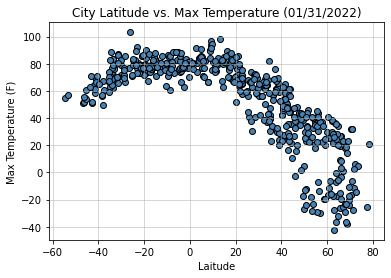

In [40]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Max Temperature (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Max Temperature.png")

### Analysis 

Highest temperature is found at 0 latitude and as the latidude increases or decreases, temperature drops.

## Latitude vs. Humidity Plot

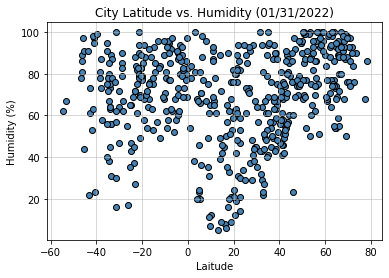

In [41]:
# Create Latitude vs. Humidity Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Humidity (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Humidity (%)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Humidity.png")

### Analysis 

Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

## Latitude vs. Cloudiness Plot

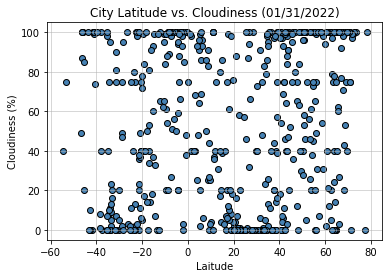

In [42]:
# Create Latitude vs. Cloudiness Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "black")

# Set title
plt.title("City Latitude vs. Cloudiness (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Cloudiness (%)")

# Set y axis limit
plt.ylim(-5,105)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Cloudiness.png")

### Analysis 

Cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

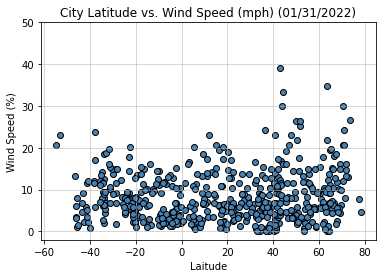

In [43]:
# Create Latitude vs. Wind Speed scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (mph) (01/31/2022)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Wind Speed (%)")

# Set y axis limit
plt.ylim(-2,50)

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../Images/City Latitude vs Wind Speed (mph).png")

### Analysis 

Wind speed data is widely spread across the latitude.

## Linear Regression

In [44]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
# Define function for creating linear agression and scatter plot
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# Define a fuction for annotating
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")
    

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.58


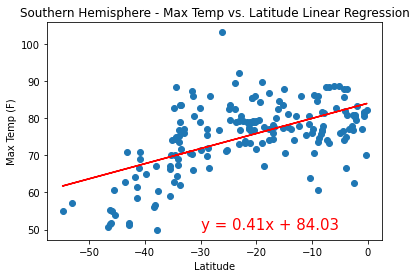

In [48]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"],southern_hemisphere["Max Temp"])

# Call an function #2
annotate(equation, -30, 50)

# Set a title
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp (F)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

### Analysis 

 The R2 Value 0.5 that is a strong negative correlation between latitude and max temperature for northern hemisphere.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.47


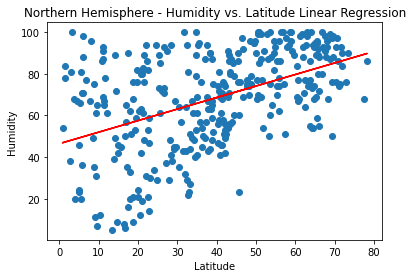

In [49]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, 0, 0)

# Set a title
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

### Analysis 

R2 Value 0.47 are a moderate positive correlation between latitude and max temperature for southern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.21


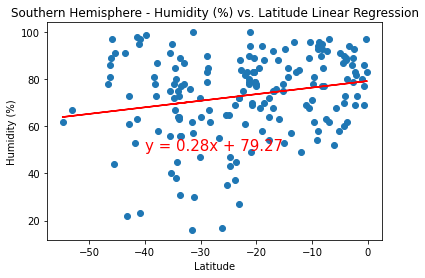

In [50]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# Call an function #2
annotate(equation, -40, 50)

# Set title
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

### Analysis 

R2 value 0.21 is a week Negative correlation between latitude and humidity for northern hemisphere

In [51]:
southern_hemisphere.shape

(178, 9)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


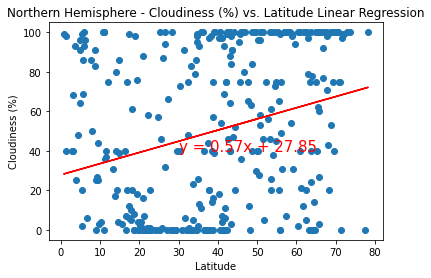

In [60]:
# Call an function #1
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, 30, 40)

# Set a title
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

### Analysis 

R2 Value 0.28 is a Week positive correlation between latitude and Cloudiness for Northen hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.28


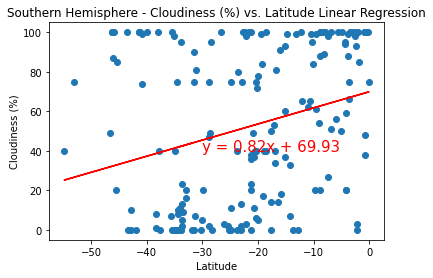

In [53]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# Call an function #2
annotate(equation, -30, 40)

# Set a title
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

### Analysis 

R2 Value 0.28 is a week correlation between latitude and Cludiness for southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


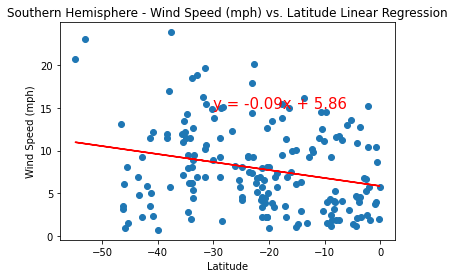

In [57]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

### Analysis 

R2 Value -0.25 There is a weak Negative correlation between latitude and Wind speed for northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.25


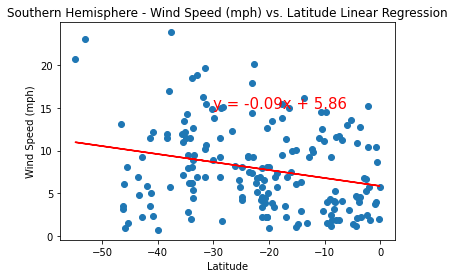

In [55]:
# Call an function #1
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# Call an function #2
annotate(equation, -30, 15)

# Set  title
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed (mph)")

# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

### Analysis 

R2 value -0.25  is a weak negative correlation between latitude and wind speed for southern hemisphere.